In [1]:
!git clone https://github.com/ultralytics/yolov5

%cd yolov5

!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np


model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

model.eval()


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-16 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 38.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
def preprocess_image(image_path):

    img = cv2.imread(image_path)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img


In [6]:
def detect_objects(image):

    results = model(image)

    return results


image_path = '/content/ob_det.jpeg'
image = preprocess_image(image_path)


results = detect_objects(image)

results.print()


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 138x366 1 potted plant, 1 tv, 1 keyboard, 1 cell phone, 1 vase
Speed: 9.6ms pre-process, 102.5ms inference, 784.4ms NMS per image at shape (1, 3, 256, 640)


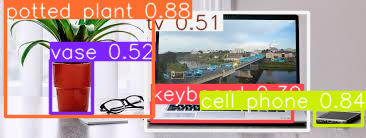

Saved 1 image to runs/detect/exp


In [7]:
results.show()

results.save('path_to_save_result_image')


In [8]:
import torch
import cv2
import csv
from collections import Counter


model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def detect_video(video_path=None):
    cap = cv2.VideoCapture(0 if video_path is None else video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        labels = results.xyxyn[0][:, -1].cpu().numpy()
        label_counts = Counter(labels)
        print(label_counts)


        if 'person' in [model.names[int(label)] for label in labels]:
            print("ALERT: Person detected!")


        cv2.imshow('YOLOv5 Object Detection', np.squeeze(results.render()))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


detect_video()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-16 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
